In [1]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np
import pandas
import random
import json
from PIL import Image, ImageDraw
import cPickle as pkl
from matplotlib.colors import LogNorm

from  scipy.spatial import distance

15


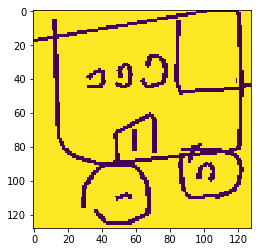

In [17]:
_tmp = pandas.read_csv('../../data_all/bus.csv')
strokes = json.loads(_tmp.iloc[20009,1])
print len(strokes)

image = Image.new("P", (256,256), color=255)
image_draw = ImageDraw.Draw(image)
for stroke in strokes:
    for i in range(len(stroke[0])-1):
        image_draw.line([stroke[0][i], 
                         stroke[1][i],
                         stroke[0][i+1], 
                         stroke[1][i+1]],
                        fill=0, width=5)
image = image.resize((128,128))
imshow(np.asarray(image))


In [ ]:
_tmp = pandas.read_csv('data_all/bear.csv')
strokes = json.loads(_tmp.iloc[20004,1])
print len(strokes)

image = Image.new("P", (256,256), color=255)
image_draw = ImageDraw.Draw(image)
for stroke in strokes:
    for i in range(len(stroke[0])-1):
        image_draw.line([stroke[0][i], 
                         stroke[1][i],
                         stroke[0][i+1], 
                         stroke[1][i+1]],
                        fill=0, width=5)
image = image.resize((128,128))
imshow(np.asarray(image))


In [8]:
def image_from(cls):
    _tmp = pandas.read_csv('../../data_all/%s.csv'%cls)
    n = len(_tmp)
    
    strokes = json.loads(_tmp.iloc[random.randint(0,n-1),1])

    image = Image.new("P", (256,256), color=255)
    image_draw = ImageDraw.Draw(image)
    for stroke in strokes:
        for i in range(len(stroke[0])-1):
            image_draw.line([stroke[0][i], 
                             stroke[1][i],
                             stroke[0][i+1], 
                             stroke[1][i+1]],
                            fill=0, width=5)
    image = image.resize((64,64))
    return image

In [9]:
fa = pkl.load(file('../../feats_all.pkl', 'rb'))

In [10]:
mean_f = {}
for k in fa:
    mean_f[k] = np.mean(fa[k], axis=0) 

In [11]:
dist_mat = np.zeros((len(fa), len(fa)), dtype=np.float32)
ks = mean_f.keys()
for i in range(len(fa)):
    for j in range(len(fa)):
        dist_mat[i,j] = distance.cosine(mean_f[ks[i]], mean_f[ks[j]])

snowman --> bear
eyeglasses --> binoculars
ceiling fan --> mosquito
camel --> rhinoceros
laptop --> computer
flying saucer --> hat
crocodile --> dolphin
chandelier --> ceiling fan
radio --> stereo
shoe --> submarine
oven --> dishwasher
keyboard --> bench
fire hydrant --> lantern
dumbbell --> trumpet
line --> string bean
popsicle --> lollipop
flashlight --> wristwatch
anvil --> underwear
peanut --> pear
backpack --> flip flops
swan --> duck
squiggle --> ocean
bench --> table
bush --> cloud
The Great Wall of China --> diving board
blueberry --> circle
tennis racquet --> microphone
circle --> potato
hockey stick --> golf club
hat --> flying saucer
flip flops --> paper clip
finger --> toe
house plant --> pineapple
eraser --> toothpaste
triangle --> tent
garden --> matches
matches --> asparagus
cannon --> skateboard
rake --> broom
screwdriver --> marker
bear --> panda
vase --> pear
helmet --> purse
spoon --> baseball bat
snorkel --> saxophone
watermelon --> steak
snake --> garden hose
compa

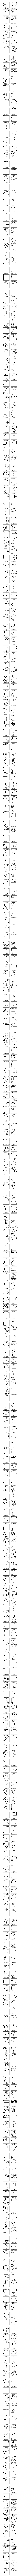

In [12]:
import matplotlib.gridspec as gridspec
N = len(fa)
#N = 3
gs = gridspec.GridSpec(N, 2)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3, 600)

for kth in range(N):
    iii = np.argsort(dist_mat[kth])
    print ks[kth], '-->', ks[iii[1]]
                       
    ax = plt.subplot(gs[kth, 0])
    ax.imshow(image_from(ks[kth]))
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    
    ax.set_title(ks[kth])
                       
    ax = plt.subplot(gs[kth, 1])
    ax.imshow(image_from(ks[iii[1]]))
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_title(ks[iii[1]])


In [18]:
dsum = dist_mat.sum(axis=1)
idxs = np.argsort(dsum)

dist_mat = dist_mat[idxs]

In [19]:
labels = []
for i in idxs:
    print ks[i],',',
    labels.append(ks[i])

bottlecap , mouse , toothpaste , telephone , yoga , sleeping bag , frog , bread , diving board , garden hose , steak , toe , trombone , key , wristwatch , megaphone , drums , shoe , marker , The Great Wall of China , toilet , camouflage , clarinet , matches , eraser , squiggle , belt , dog , lobster , mosquito , pool , pliers , drill , fire hydrant , axe , cannon , hockey puck , cooler , teapot , helmet , pond , screwdriver , frying pan , nail , bear , string bean , knee , backpack , bird , mailbox , blueberry , lantern , bridge , underwear , roller coaster , bathtub , trumpet , streetlight , whale , binoculars , raccoon , pillow , necklace , dragon , elephant , couch , hot tub , toaster , rhinoceros , dolphin , spoon , submarine , sea turtle , flashlight , cactus , watermelon , anvil , bed , hammer , suitcase , hat , chandelier , bench , boomerang , sink , flip flops , garden , speedboat , piano , bulldozer , bat , leaf , see saw , parrot , sandwich , flying saucer , flamingo , eyegla

In [20]:
print idxs
print ks[319]

[319  67 182 256 271 321 185  50 230 337  68 197  90 166 116 194 134   9
 170  24 247 278  98  36  33  21 175 324  87  65 314 136 121  12 327  37
 172  63 283  42 263  39 286  83  40  54 311  19 117 128  25  69 162 141
 229  84 266 191 246 307 152 150 308 163 285 279 189 275 280 118  43 188
  57  16  93  45  17 232  94 239  29   7  22 173 133  30  35 259 242  72
  52 100 165  55 295   5  53   1  51  66  79 193 264 154 160 147 240  18
 126 218  95  46 208 227 169  59 244  44 125 334 122 221 196 214   6 140
 255  13 113 184 268 219 101 146 309 225 192 276  11 282 199 338 203 195
 190 105 257 108  97 248  41 289 254  61 291 171  31   3 292 213 210  20
 215 270 333 158 335 336  48 135 245 258  23 294 202   4 168 181 313  10
  15  60 102 284  78 144 159 274  28 156 120 110   8 222 320  49 317 164
 293 332 315 233 123 207 127  75 212 204  76   2  58 297  56 142 198 300
 139  86 267 223 312 318 130 186  64 328  89  62 201 220 316 262  32 114
 178 145 200 330 326  82 211 241  99 231  96 217 14

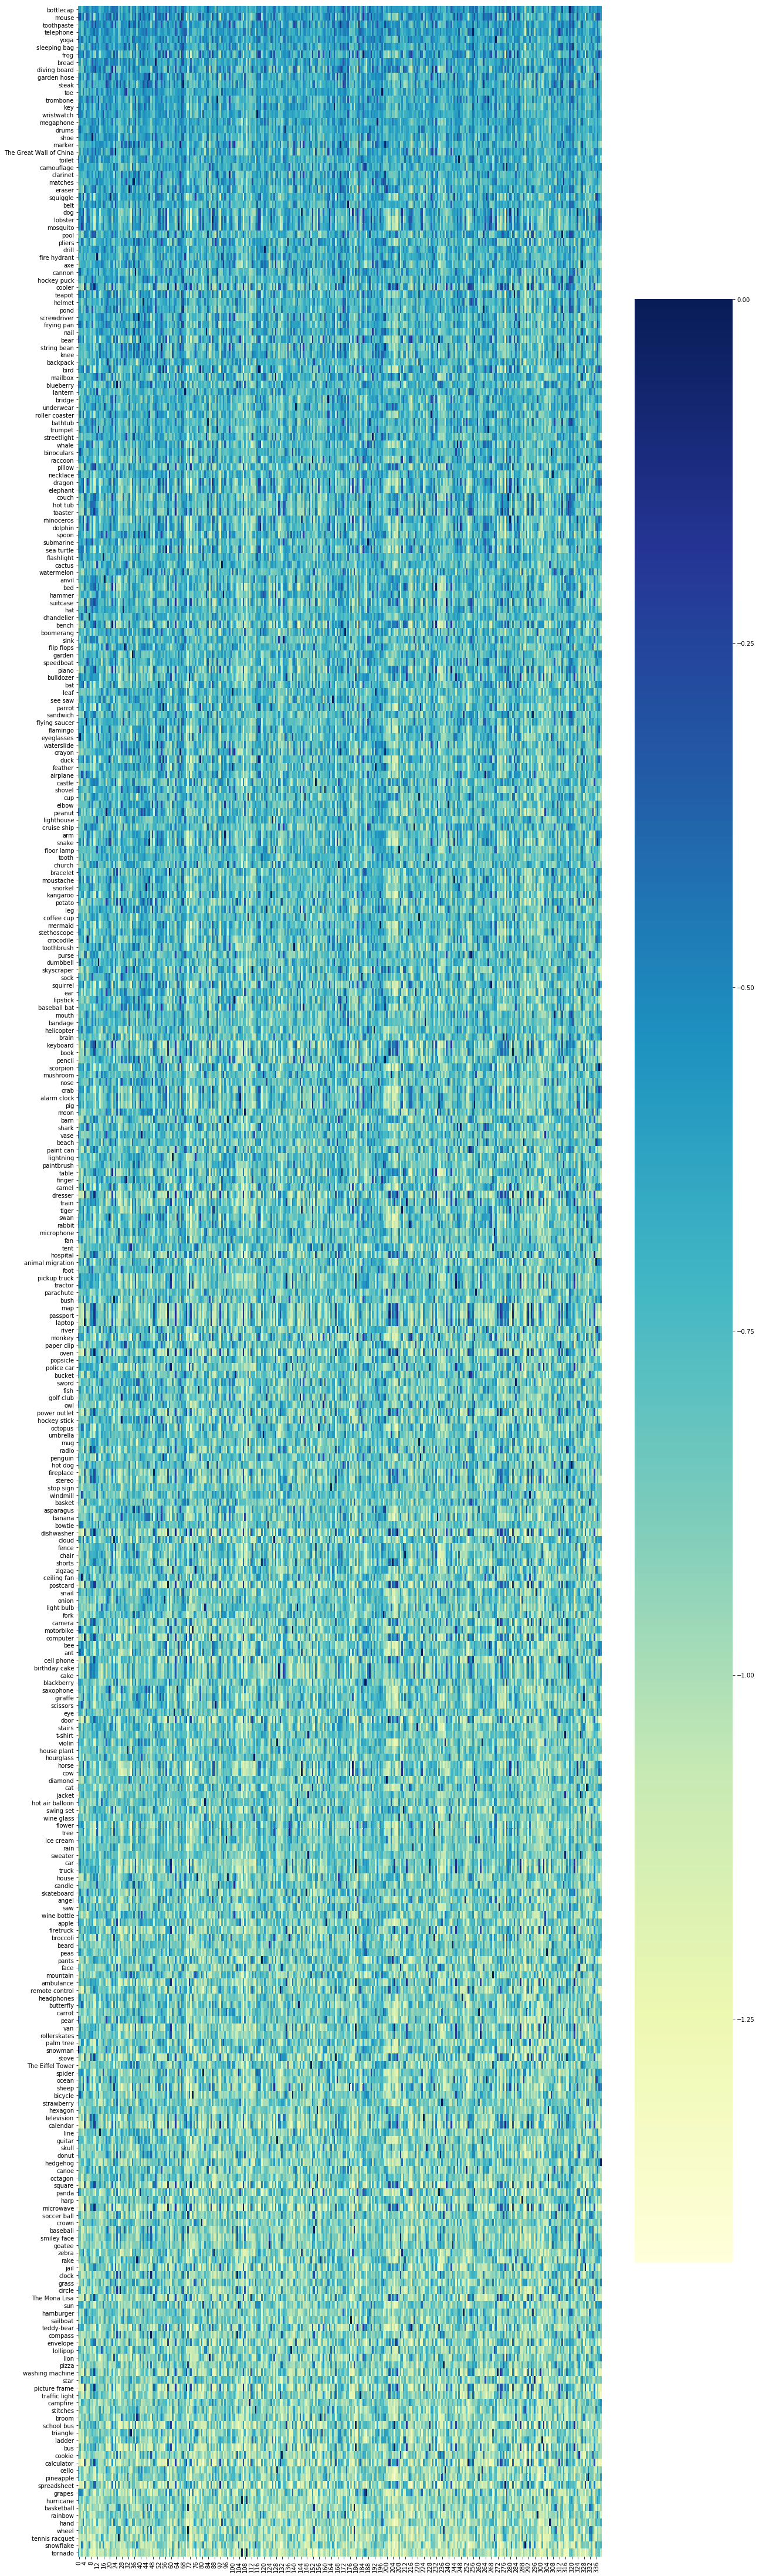

In [21]:
fig, ax = plt.subplots(figsize=(20,80))

hm = sns.heatmap(1-np.exp(dist_mat), ax=ax, cmap="YlGnBu")

_ = hm.set_yticklabels(labels)
